In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import beam.calc.electron as ecalc
import scipy.constants as const
from beam.beams import electronbeam
from beam import interactions
plt.style.use('presentation')
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
e = const.physical_constants['elementary charge'][0]
path = 'E-300_Meeting_July-2019/'

green = '#228833'
purple = '#AA3377'
cyan = '#33BBEE'
red = '#CC3311'
yellow = '#CCBB44'
orange = '#EE7733'
blue = '#0077BB'
magenta = '#EE3377'
# Not from the color palette
grey = '#444444'
# Not from the color palette
grey = '#444444'

In [2]:
# Setup the parameters for simulation
Nz = 2000
z = np.linspace(0, 100*2*np.pi, Nz, dtype='double')
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2 # Go from Robert units to normalized units
ne = ne0*np.ones(Nz)
kb = 5.95074e4 * np.sqrt(ne0)/np.sqrt(2*gb0)
betaBeam = 1
alphaBeam = 0
eps = 1.0e-6
delta = 0.02
sigma_r0 = np.sqrt(betaBeam*eps)
electronParams = {
    'name' : 'No_Offset',
    'path' : path,
    'load' : False,
    'N' : 100000,
    'gamma' : 20000,
    'emittance' : gb0*eps,
    'betax' : betaBeam,
    'betay' : betaBeam,
    'alphax' : alphaBeam,
    'alphay' : alphaBeam,
    'sigmaz' : 5e-6,
    'dE' : delta
}

class plasmaCls():
    def __init__(self):
        """ Empy init function """
    def get_ne(self, z):
        return ne
    def dgammadz(self, ne):
        return 0.0
    
plasmaDen = plasmaCls()
dumpPer = 10

In [3]:
# Matched offset beam
dumpPer = 1
offset = 1.0
electronParams['offset_y'] = 0
electronParams['offset_xp'] = 0
electronParams['offset_yp'] = 0
electronParams['offset_x'] = offset*sigma_r0
electronParams['name'] = 'x-%0.2fsigmar0_Emittance' % (offset)
beam = electronbeam.OffsetGaussianElectronBeam(electronParams)
interactions.electron_plasma(beam, plasmaDen, z*1e6, dumpPer, 4)
beam_CS = beam.get_CS()
ptcls = beam.load_ptcls(int(Nz/dumpPer)-1)[0]

ptcls = beam.load_ptcls(0)[0]
x = beam.get_x(ptcls)
xp = beam.get_xp(ptcls)
syyp = np.average(x*xp)

z_plot = np.linspace(0, 100*2*np.pi, 10000)
sy2 = sigma_r0**2*(1  + offset**2)
gammaBeam = (1+alphaBeam**2)/betaBeam
syp2 = gammaBeam*eps
DeltaY = offset*sigma_r0
Psimax = z_plot/(np.sqrt(1-delta))
Psimin = z_plot/(np.sqrt(1+delta))
DeltaPsi = (Psimax-Psimin)

eps_sat_0 = (1+0.5*offset**2)
emt = 0.5*np.sqrt((sy2+syp2)**2-np.sinc(DeltaPsi/np.pi)**2*((syp2-sy2)**2+4*syyp**2)-2*np.sinc(DeltaPsi/2/np.pi)**2
                 *((sy2+syp2)*DeltaY**2+np.sinc(DeltaPsi/np.pi)*(syp2-sy2)*DeltaY**2))/eps

In [4]:
# No offset mismatched beam
dumpPer = 1
beta0 = 2.5
electronParams['offset_y'] = 0
electronParams['offset_xp'] = 0
electronParams['offset_yp'] = 0
electronParams['offset_x'] = 0
electronParams['betax'] = beta0
electronParams['name'] = 'Mismatched_Emittance'
beam1 = electronbeam.OffsetGaussianElectronBeam(electronParams)
interactions.electron_plasma(beam1, plasmaDen, z*1e6, dumpPer, 4)
beam_CS1 = beam1.get_CS()
ptcls = beam1.load_ptcls(int(Nz/dumpPer)-1)[0]

z_plot = np.linspace(0, 100*2*np.pi, 10000)
Psimax = z_plot/(np.sqrt(1-delta))
Psimin = z_plot/(np.sqrt(1+delta))
DeltaPsi = (Psimax-Psimin)

eps_sat = 0.5*(1/beta0+beta0)
emt_mis = eps_sat*np.sqrt(1-(4*eps_sat**2-4)/(4*eps_sat**2)*np.sinc(DeltaPsi/np.pi)**2)

In [5]:
# Matched offset beam
dumpPer = 1
offset = 1.0
electronParams['offset_y'] = 0
electronParams['offset_xp'] = 0
electronParams['offset_yp'] = 0
electronParams['offset_x'] = offset*sigma_r0
electronParams['name'] = 'Offset_Mismatched'
beam2 = electronbeam.OffsetGaussianElectronBeam(electronParams)
interactions.electron_plasma(beam2, plasmaDen, z*1e6, dumpPer, 4)
beam_CS2 = beam2.get_CS()
ptcls = beam2.load_ptcls(int(Nz/dumpPer)-1)[0]

ptcls = beam2.load_ptcls(0)[0]
x = beam2.get_x(ptcls)
xp = beam2.get_xp(ptcls)
syyp = np.average(x*xp)

z_plot = np.linspace(0, 100*2*np.pi, 10000)
sy2 = sigma_r0**2*offset**2+beta0*eps
gammaBeam = (1+alphaBeam**2)/beta0
syp2 = gammaBeam*eps
DeltaY = offset*sigma_r0
Psimax = z_plot/(np.sqrt(1-delta))
Psimin = z_plot/(np.sqrt(1+delta))
DeltaPsi = (Psimax-Psimin)

eps_sat_2 = eps_sat+0.5*offset**2
emt_both = 0.5*np.sqrt((sy2+syp2)**2-np.sinc(DeltaPsi/np.pi)**2*((syp2-sy2)**2+4*syyp**2)-2*np.sinc(DeltaPsi/2/np.pi)**2
                 *((sy2+syp2)*DeltaY**2+np.sinc(DeltaPsi/np.pi)*(syp2-sy2)*DeltaY**2))/eps

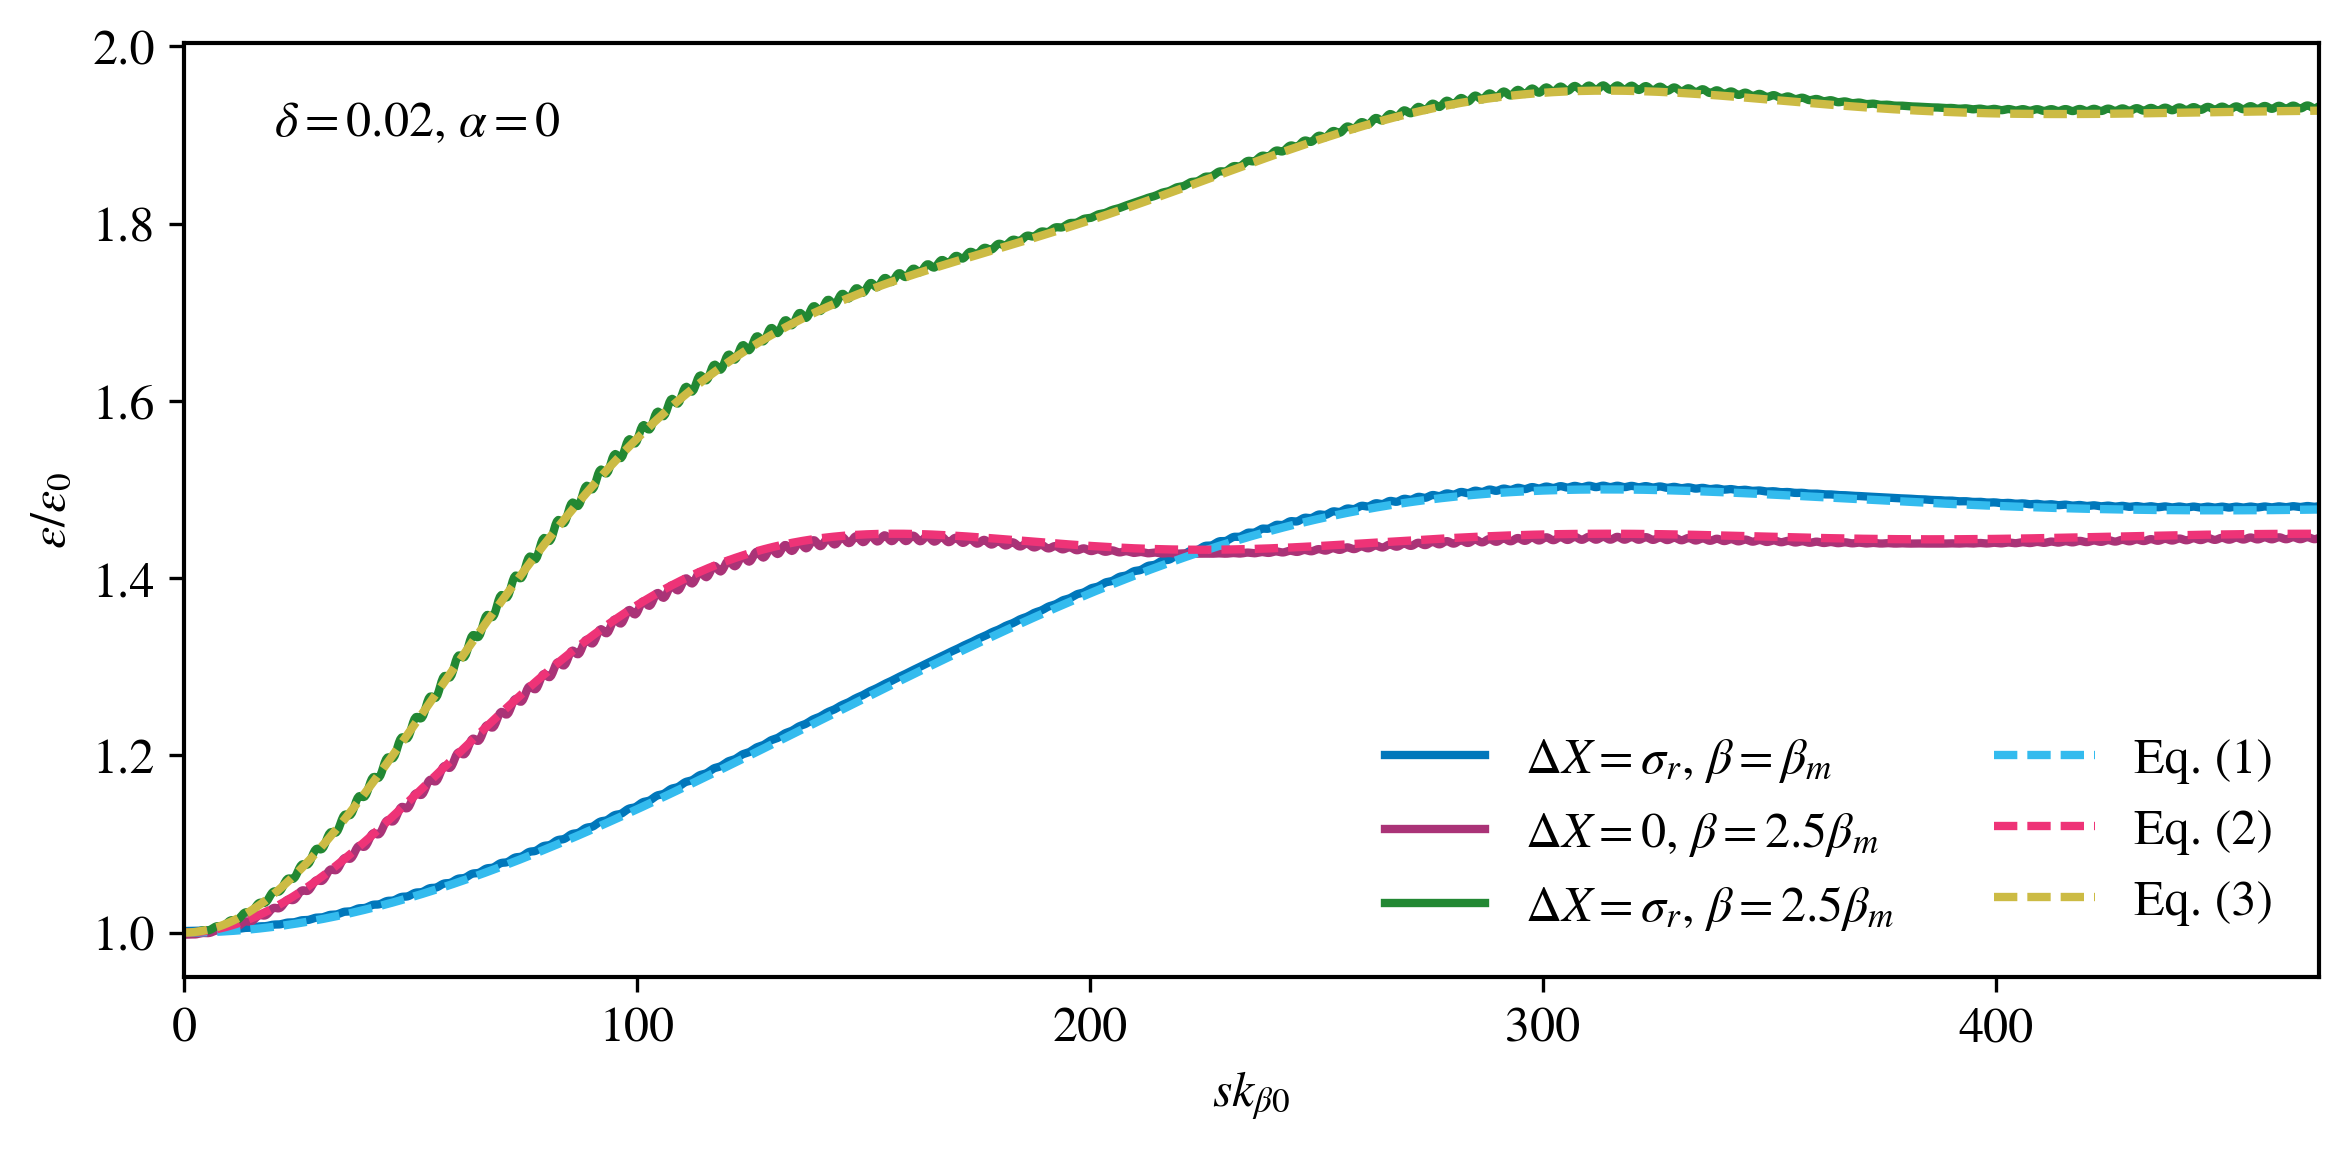

In [15]:
plt.figure(figsize=(8, 4), dpi=300)
plt.plot(beam.z, beam_CS['eps_x']/eps, c=blue, label=r'$\Delta X=\sigma_{r}$, $\beta=\beta_m$')
plt.plot(beam1.z, beam_CS1['eps_x']/eps, c=purple, label=r'$\Delta X=0$, $\beta=2.5\beta_m$')
plt.plot(beam2.z, beam_CS2['eps_x']/eps, c=green, label=r'$\Delta X=\sigma_{r}$, $\beta=2.5\beta_m$')

plt.plot(z_plot, emt, '--', c=cyan, label='Eq. (1)')
plt.plot(z_plot, emt_mis, '--', c=magenta, label='Eq. (2)')
plt.plot(z_plot, emt_both, '--', c=yellow, label='Eq. (3)')

plt.text(20, 1.9, r'$\delta=0.02$, $\alpha=0$')
plt.legend(frameon=False, loc=4, ncol=2)
plt.xlabel(r'$sk_{\beta0}$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.xlim(0, 75*2*np.pi)
plt.tight_layout()
plt.savefig(path+'Emittance_Evolution.svg')
plt.show()